<a href="https://colab.research.google.com/github/MalikaIT21277122/DL_Lab07_IT21277122-/blob/main/lab_7_AE_CNN_Image_Denoising_Malika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [ ]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
tf.random.normal(shape=x_train.shape)

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[-1.6436929 ],
         [-1.1681787 ],
         [-1.5056459 ],
         ...,
         [-0.13508137],
         [-2.6519735 ],
         [-0.15764822]],

        [[-0.45180055],
         [ 0.6891181 ],
         [-0.7306993 ],
         ...,
         [-0.9812024 ],
         [-1.6119576 ],
         [-0.32272846]],

        [[-0.26849732],
         [-0.11163415],
         [ 0.03668929],
         ...,
         [ 1.0137805 ],
         [-0.2861077 ],
         [-1.1178483 ]],

        ...,

        [[-0.2779724 ],
         [-1.5410594 ],
         [-0.25091895],
         ...,
         [-0.475732  ],
         [-0.01307773],
         [-1.6892078 ]],

        [[-0.12891905],
         [-0.2837936 ],
         [-0.69709724],
         ...,
         [ 0.8284333 ],
         [-1.8885276 ],
         [-0.04817384]],

        [[-0.43308195],
         [ 0.2838473 ],
         [ 1.0311478 ],
         ...,
         [-0.02236482],
         [-0.570

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train  +  noise_factor * tf.random.normal(shape=x_train.shape)
# noise factor multiplication result in increased spread in noise distribution
# result in 0.2^2 increase of variance, mean doesn't chnage (mean = 0)
x_test_noisy = x_test  +  noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [ ]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

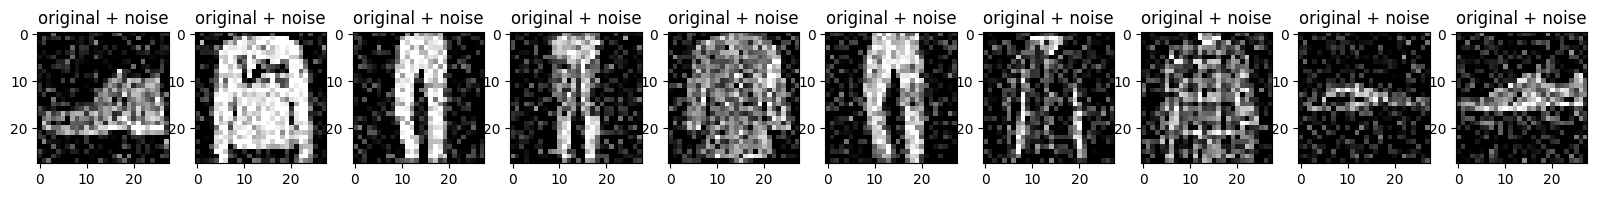

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [ ]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - loss: 0.0381 - val_loss: 0.0094
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - loss: 0.0091 - val_loss: 0.0085
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 39ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 12

In [ ]:
autoencoder.encoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.decoder.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

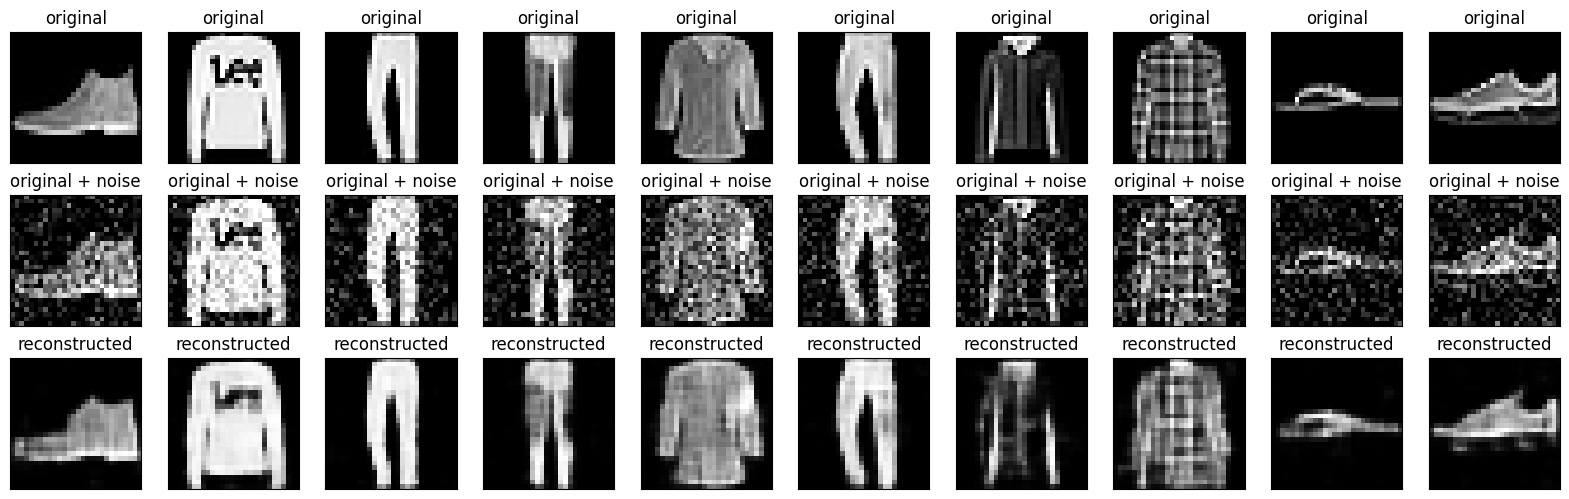

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [ ]:
loss = autoencoder.evaluate(x_test_noisy, x_test, verbose=0)
print("Mean Squared Error on test data:", loss)


Mean Squared Error on test data: 0.006802058313041925


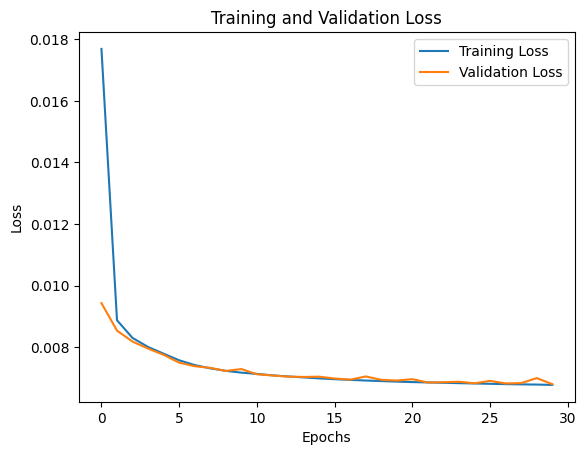

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
